# Descriptive analysis

- Combining whole dataset
- Delete any null
- Make labeling for companies + sentiments
- Define BR, RR and make their analysis

# 1)- Importing key modules

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Visualization 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import seaborn as sns
plt.rcParams["figure.figsize"] = (16, 10)
plt.rcParams["xtick.labelsize"] = 10
plt.figure(figsize=(16,10)) # this creates a figure 16 inch wide, 10 inch high
from pprint import pprint
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 2)- Load data

In [3]:
import pickle
#Loading from firm cleaned file
df = pd.read_pickle('descript.pkl')
#df=df.drop('Unnamed: 0',axis=1)

In [4]:
df.head()

,TEXT,UTC DATE,Sent_type
1,"Another reason I failed in love is I'm poor,I ...",2018-07-31 23:13:47,Benefit
2,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,2018-07-31 23:30:00,Neutral
3,"Happy birthday to the Audi chasing maniac, hop...",2018-07-31 22:52:45,Benefit
4,Come see Mercedes Benz stadium in Atlanta...,2018-07-31 23:02:25,Neutral
5,Italy took Cristiano and ever since then they’...,2018-07-31 22:53:15,Neutral


In [5]:
df.shape

(455727, 3)

**rename column**

In [6]:
df=df.rename(columns={"Sent_type": "sentiment"})

In [7]:
df.sentiment.value_counts()

Neutral    195719
Benefit    182533
Risky       77475
Name: sentiment, dtype: int64

In [8]:
df.sentiment.value_counts(normalize=True)

Neutral    0.429465
Benefit    0.400531
Risky      0.170003
Name: sentiment, dtype: float64

In [9]:
df.dtypes

TEXT         object
UTC DATE     object
sentiment    object
dtype: object

### 2.1)- Time series

In [10]:
df['date']=pd.to_datetime(df['UTC DATE'])

In [11]:
df.dtypes

TEXT                 object
UTC DATE             object
sentiment            object
date         datetime64[ns]
dtype: object

In [12]:
df=df.drop('UTC DATE', axis=1)

**Getting only Year, month and day**

In [13]:
df['Date'] = df['date'].dt.date

In [14]:
df.dtypes

TEXT                 object
sentiment            object
date         datetime64[ns]
Date                 object
dtype: object

In [15]:
df.head()

,TEXT,sentiment,date,Date
1,"Another reason I failed in love is I'm poor,I ...",Benefit,2018-07-31 23:13:47,2018-07-31
2,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,Neutral,2018-07-31 23:30:00,2018-07-31
3,"Happy birthday to the Audi chasing maniac, hop...",Benefit,2018-07-31 22:52:45,2018-07-31
4,Come see Mercedes Benz stadium in Atlanta...,Neutral,2018-07-31 23:02:25,2018-07-31
5,Italy took Cristiano and ever since then they’...,Neutral,2018-07-31 22:53:15,2018-07-31


In [16]:
df=df.drop('date', axis=1)

In [17]:
df.head()

,TEXT,sentiment,Date
1,"Another reason I failed in love is I'm poor,I ...",Benefit,2018-07-31
2,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,Neutral,2018-07-31
3,"Happy birthday to the Audi chasing maniac, hop...",Benefit,2018-07-31
4,Come see Mercedes Benz stadium in Atlanta...,Neutral,2018-07-31
5,Italy took Cristiano and ever since then they’...,Neutral,2018-07-31


**Converting to datetime from Object type**

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df.dtypes

TEXT                 object
sentiment            object
Date         datetime64[ns]
dtype: object

In [20]:
df['Date'].dt.year[:5]

1    2018
2    2018
3    2018
4    2018
5    2018
Name: Date, dtype: int64

In [21]:
df['Date'].dt.year.sort_values()[:5]

455727    2016
191112    2016
191113    2016
191114    2016
191115    2016
Name: Date, dtype: int64

In [22]:
data_year=df['Date'].dt.year.sort_values()

In [23]:
j=df.groupby(data_year)['sentiment'].value_counts()

In [24]:
j

Date  sentiment
2016  Neutral      80724
      Benefit      62723
      Risky        26509
2017  Neutral      65635
      Benefit      55896
      Risky        23139
2018  Benefit      63779
      Neutral      49271
      Risky        27750
2019  Benefit        135
      Neutral         89
      Risky           77
Name: sentiment, dtype: int64

In [25]:
type(j)

pandas.core.series.Series

In [26]:
j_df=pd.DataFrame(j)

In [27]:
j_df

sentiment
Date sentiment           
2016 Neutral        80724
     Benefit        62723
     Risky          26509
2017 Neutral        65635
     Benefit        55896
     Risky          23139
2018 Benefit        63779
     Neutral        49271
     Risky          27750
2019 Benefit          135
     Neutral           89
     Risky             77

We have problem of two "sentiment"variable in columns. We need to fix it by count() method

# 3)- Make a dataframe

- For year
- For month

In [28]:
new_df=df[['sentiment','Date']]
new_df.head()

,sentiment,Date
1,Benefit,2018-07-31
2,Neutral,2018-07-31
3,Benefit,2018-07-31
4,Neutral,2018-07-31
5,Neutral,2018-07-31


In [29]:
new_df['year']= new_df['Date'].dt.year

In [30]:
new_df.head()

,sentiment,Date,year
1,Benefit,2018-07-31,2018
2,Neutral,2018-07-31,2018
3,Benefit,2018-07-31,2018
4,Neutral,2018-07-31,2018
5,Neutral,2018-07-31,2018


In [31]:
new_df=new_df.drop('Date', axis=1)

In [32]:
df_ct = (new_df.reset_index()
          .groupby(['year','sentiment'], as_index=False)
          .count()
          # rename isn't strictly necessary here, it's just for readability
          .rename(columns={'index':'count'})
       )

In [33]:
df_ct

,year,sentiment,count
0,2016,Benefit,62723
1,2016,Neutral,80724
2,2016,Risky,26509
3,2017,Benefit,55896
4,2017,Neutral,65635
5,2017,Risky,23139
6,2018,Benefit,63779
7,2018,Neutral,49271
8,2018,Risky,27750
9,2019,Benefit,135


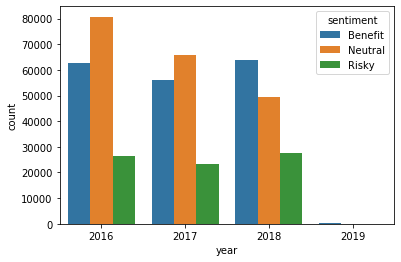

In [34]:
sns.barplot(x="year", y="count",hue="sentiment", data=df_ct);

### For monthly trend

In [35]:
df.head()

,TEXT,sentiment,Date
1,"Another reason I failed in love is I'm poor,I ...",Benefit,2018-07-31
2,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,Neutral,2018-07-31
3,"Happy birthday to the Audi chasing maniac, hop...",Benefit,2018-07-31
4,Come see Mercedes Benz stadium in Atlanta...,Neutral,2018-07-31
5,Italy took Cristiano and ever since then they’...,Neutral,2018-07-31


In [36]:
df.dtypes

TEXT                 object
sentiment            object
Date         datetime64[ns]
dtype: object

In [37]:
# making new dataframe
df_month=df[['sentiment','Date']]

In [38]:
df_month['month']=df['Date'].dt.month.sort_values()

In [39]:
df_month.head(2)

,sentiment,Date,month
1,Benefit,2018-07-31,7
2,Neutral,2018-07-31,7


In [40]:
df_month.dtypes

sentiment            object
Date         datetime64[ns]
month                 int64
dtype: object

In [41]:
df_month.month.unique()

array([ 7, 12, 10, 11,  2,  4,  1,  5,  9,  3,  8,  6], dtype=int64)

**As we can see that there should be more month from 2016 to 2019. We have not got all month count correct**

# 4)- Fixing month problem

In [42]:
df_month['month_time']=df_month['Date'].dt.to_period('M')

In [43]:
df_month.head()

,sentiment,Date,month,month_time
1,Benefit,2018-07-31,7,2018-07
2,Neutral,2018-07-31,7,2018-07
3,Benefit,2018-07-31,7,2018-07
4,Neutral,2018-07-31,7,2018-07
5,Neutral,2018-07-31,7,2018-07


In [44]:
df_month.dtypes

sentiment             object
Date          datetime64[ns]
month                  int64
month_time         period[M]
dtype: object

In [45]:
df_month['month'].unique()

array([ 7, 12, 10, 11,  2,  4,  1,  5,  9,  3,  8,  6], dtype=int64)

In [46]:
df_month['month_time'].unique()

<PeriodArray>
['2018-07', '2018-12', '2018-10', '2016-11', '2016-02', '2016-04', '2017-07',
 '2016-12', '2017-01', '2017-05', '2017-11', '2016-09', '2017-09', '2016-05',
 '2017-03', '2017-02', '2016-03', '2016-07', '2018-04', '2017-12', '2018-09',
 '2017-08', '2018-08', '2016-06', '2018-03', '2016-08', '2018-02', '2018-05',
 '2017-04', '2017-06', '2018-06', '2016-01', '2016-10', '2018-01', '2017-10',
 '2019-01', '2018-11']
Length: 37, dtype: period[M]

In [47]:
df_month=df_month[['sentiment','month_time']]

In [48]:
df_month.head()

,sentiment,month_time
1,Benefit,2018-07
2,Neutral,2018-07
3,Benefit,2018-07
4,Neutral,2018-07
5,Neutral,2018-07


In [49]:
data_month=df_month['month_time']

In [50]:
df_count = (df_month.reset_index()
          .groupby(['month_time','sentiment'], as_index=False)
          .count()
          # rename isn't strictly necessary here, it's just for readability
          .rename(columns={'index':'ct'})
       )

In [51]:
df_count

,month_time,sentiment,ct
0,2016-01,Benefit,5021
1,2016-01,Neutral,7057
2,2016-01,Risky,2280
3,2016-02,Benefit,4773
4,2016-02,Neutral,6173
...,...,...,...
106,2018-12,Neutral,3958
107,2018-12,Risky,2510
108,2019-01,Benefit,135
109,2019-01,Neutral,89


We have created plot yet we need clear plots.

### 5- Add RR and BR 

Do it manually

- RR= (RT)/(RT+BT)
- BR= (BT)/(RT+BT)

### 5.1)- For year

We have df_ct for year

In [52]:
df_ct

,year,sentiment,count
0,2016,Benefit,62723
1,2016,Neutral,80724
2,2016,Risky,26509
3,2017,Benefit,55896
4,2017,Neutral,65635
5,2017,Risky,23139
6,2018,Benefit,63779
7,2018,Neutral,49271
8,2018,Risky,27750
9,2019,Benefit,135


**Only for Risky and benefit related sentiments**

In [53]:
df_ct=df_ct[df_ct.sentiment!= "Neutral"]

In [54]:
df_ct

,year,sentiment,count
0,2016,Benefit,62723
2,2016,Risky,26509
3,2017,Benefit,55896
5,2017,Risky,23139
6,2018,Benefit,63779
8,2018,Risky,27750
9,2019,Benefit,135
11,2019,Risky,77


In [55]:
df.sentiment.value_counts()

Neutral    195719
Benefit    182533
Risky       77475
Name: sentiment, dtype: int64

- RR= (RT)/(RT+BT)
- BR= (BT)/(RT+BT)

In [56]:
# manually calculated values per year
BR=[0.7029 , 0.7072 , 0.6967 , 0.6367]
RR=[0.2970 , 0.2927 , 0.3032 , 0.3632]

In [57]:
#add_BR=[0.7981,0, 0.7970, 0.8188 , 1]
#add_RR=[0.2018 , 0.2029 , 0.1811 , 0]

In [58]:
add_values=[0.7029 , 0.2970 , 0.7072 , 0.2927 , 0.6967 , 0.3032 , 0.6367 , 0.3632]

In [59]:
df_ct['ratio']= add_values

In [60]:
df_ct

,year,sentiment,count,ratio
0,2016,Benefit,62723,0.7029
2,2016,Risky,26509,0.2970
3,2017,Benefit,55896,0.7072
5,2017,Risky,23139,0.2927
6,2018,Benefit,63779,0.6967
8,2018,Risky,27750,0.3032
9,2019,Benefit,135,0.6367
11,2019,Risky,77,0.3632


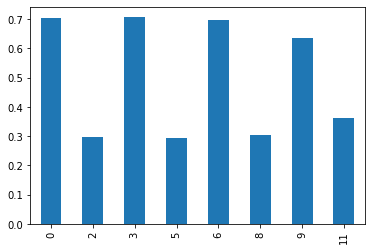

In [61]:
df_ct.ratio.plot(kind='bar')

### A neat plot

For BR and RR w.r.t year

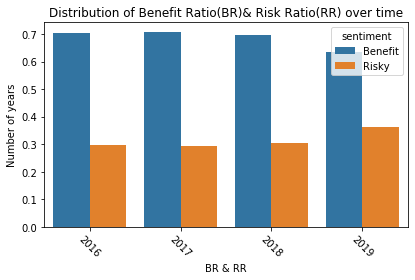

In [62]:
ax = sns.barplot(x="year", y="ratio", hue="sentiment", data=df_ct)
# Rotate x-labels
plt.xticks(rotation=-45)
# for text labeling on axis
plt.xlabel("BR & RR")
plt.ylabel("Number of years")
plt.title("Distribution of Benefit Ratio(BR)& Risk Ratio(RR) over time")
plt.tight_layout()
plt.show()

### For Stack chart

In [63]:
BR=[0.7029 , 0.7072 , 0.6967 , 0.6367]
RR=[0.2970 , 0.2927 , 0.3032 , 0.3632]

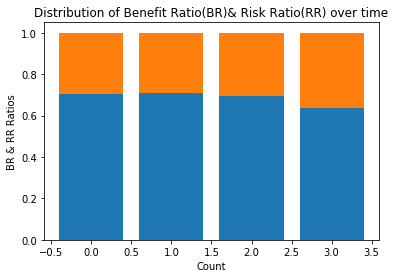

In [64]:
plt.bar(range(len(BR)), BR)
plt.bar(range(len(RR)), RR, bottom=BR)
plt.xlabel("Count")
plt.ylabel("BR & RR Ratios")
plt.title("Distribution of Benefit Ratio(BR)& Risk Ratio(RR) over time")
plt.show()

### Better chart with year as x , ratios as y

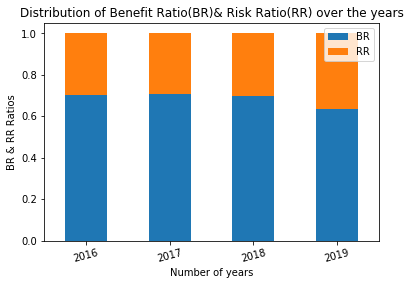

In [65]:
data={"BR":[0.7029 , 0.7072 , 0.6967 , 0.6367],
      "RR":[0.2970 , 0.2927 , 0.3032 , 0.3632]
     };
index=["2016", "2017","2018","2019"]
#Dictionary loaded into a dataframe

df_strackchart=pd.DataFrame(data=data , index=index);

#Ploting stack chart

df_strackchart.plot.bar(stacked=True , rot=15 , title= "Distribution of Benefit Ratio(BR)& Risk Ratio(RR) over the years")
plt.xlabel("Number of years")
plt.ylabel("BR & RR Ratios")
plt.show(block=True);

# 6)- Plotting sentiments against month

- Plot risk against month-year
- plot benefit against month-year

In [66]:
df_count

,month_time,sentiment,ct
0,2016-01,Benefit,5021
1,2016-01,Neutral,7057
2,2016-01,Risky,2280
3,2016-02,Benefit,4773
4,2016-02,Neutral,6173
...,...,...,...
106,2018-12,Neutral,3958
107,2018-12,Risky,2510
108,2019-01,Benefit,135
109,2019-01,Neutral,89


In [67]:
df_count.shape

(111, 3)

In [68]:
df_count.head()

,month_time,sentiment,ct
0,2016-01,Benefit,5021
1,2016-01,Neutral,7057
2,2016-01,Risky,2280
3,2016-02,Benefit,4773
4,2016-02,Neutral,6173


In [69]:
q=df_count

In [70]:
q=q[q.sentiment!= "Neutral"]

In [71]:
q.shape

(74, 3)

### Calculating BR & RR 

In [85]:
q.head()

,month_time,sentiment,ct
0,2016-01,Benefit,5021
2,2016-01,Risky,2280
3,2016-02,Benefit,4773
5,2016-02,Risky,1955
6,2016-03,Benefit,5378


In [86]:
q.tail()

,month_time,sentiment,ct
104,2018-11,Risky,2172
105,2018-12,Benefit,5361
107,2018-12,Risky,2510
108,2019-01,Benefit,135
110,2019-01,Risky,77


In [80]:
df_time=q['month_time']

In [90]:
len(list(df_time))

74

In [72]:
df_br=q[q.sentiment== 'Benefit']

In [73]:
count_BR= df_br['ct']

In [74]:
df_rr=q[q.sentiment== 'Risky']

In [75]:
count_RR=df_rr['ct']

In [77]:
type(count_BR)

pandas.core.series.Series

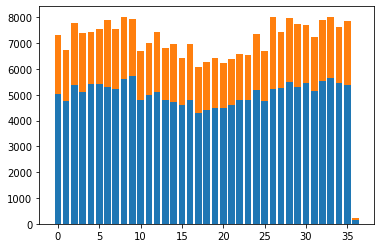

In [76]:
plt.bar(range(len(count_BR)), count_BR)
plt.bar(range(len(count_RR)), count_RR, bottom=count_BR)
plt.show()

### Better chart with months as x , ratios as y

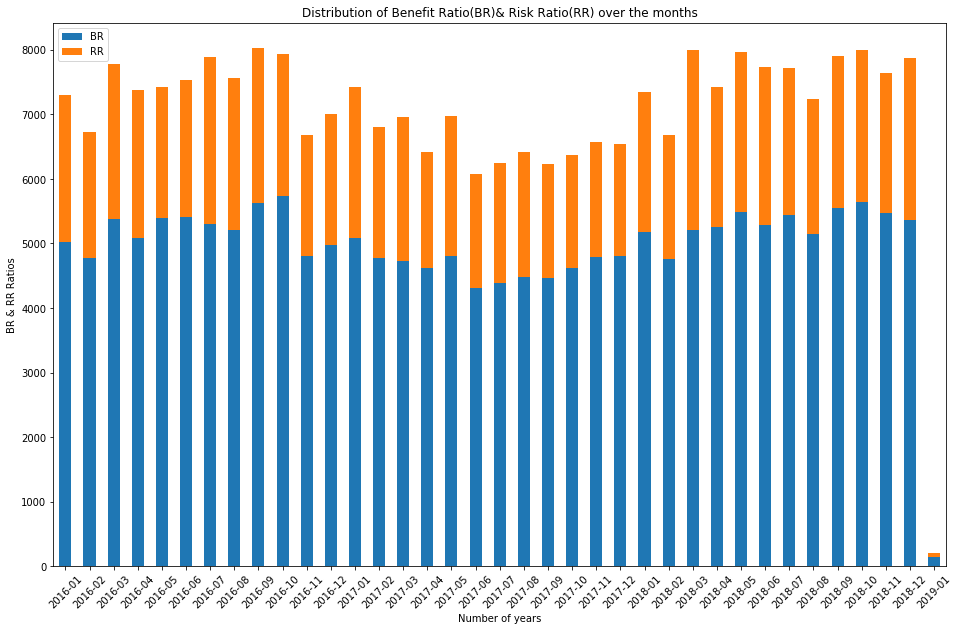

In [130]:
data={"BR": list(count_BR),
      "RR": list(count_RR)
     };
index=["2016-01","2016-02","2016-03","2016-04","2016-05","2016-06","2016-07","2016-08","2016-09","2016-10","2016-11","2016-12",
      "2017-01","2017-02","2017-03","2017-04","2017-05","2017-06","2017-07","2017-08","2017-09","2017-10","2017-11","2017-12",
       "2018-01","2018-02","2018-03","2018-04","2018-05","2018-06","2018-07","2018-08","2018-09","2018-10","2018-11","2018-12",
       "2019-01"]
#Dictionary loaded into a dataframe
df_strackchart=pd.DataFrame(data=data , index=index);

#Ploting stack chart

df_strackchart.plot.bar(stacked=True , rot=45 , title= "Distribution of Benefit Ratio(BR)& Risk Ratio(RR) over the months")
plt.xlabel("Number of years")
plt.ylabel("BR & RR Ratios")
plt.show(block=True);

### For Only RR and BR

Our above plot is not plotted for as per ratio

In [131]:
data={"Ben": list(count_BR),
      "Risk": list(count_RR)
     };
index=["2016-01","2016-02","2016-03","2016-04","2016-05","2016-06","2016-07","2016-08","2016-09","2016-10","2016-11","2016-12",
      "2017-01","2017-02","2017-03","2017-04","2017-05","2017-06","2017-07","2017-08","2017-09","2017-10","2017-11","2017-12",
       "2018-01","2018-02","2018-03","2018-04","2018-05","2018-06","2018-07","2018-08","2018-09","2018-10","2018-11","2018-12",
       "2019-01"]
#Dictionary loaded into a dataframe
df_strackchart=pd.DataFrame(data=data , index=index);

In [132]:
df_strackchart.head()

,Ben,Risk
2016-01,5021,2280
2016-02,4773,1955
2016-03,5378,2408
2016-04,5092,2291
2016-05,5400,2021


In [133]:
w=df_strackchart

In [134]:
# using formula to create new variables
w['RR']=(w['Risk'])/(w['Risk']+w['Ben'])
w['BR']=(w['Ben'])/(w['Risk']+w['Ben'])

In [135]:
w.head()

,Ben,Risk,RR,BR
2016-01,5021,2280,0.312286,0.687714
2016-02,4773,1955,0.290577,0.709423
2016-03,5378,2408,0.309273,0.690727
2016-04,5092,2291,0.310307,0.689693
2016-05,5400,2021,0.272335,0.727665


In [136]:
df_strackchart= w.drop(['Ben','Risk'], axis=1)

In [137]:
df_strackchart.head()

,RR,BR
2016-01,0.312286,0.687714
2016-02,0.290577,0.709423
2016-03,0.309273,0.690727
2016-04,0.310307,0.689693
2016-05,0.272335,0.727665


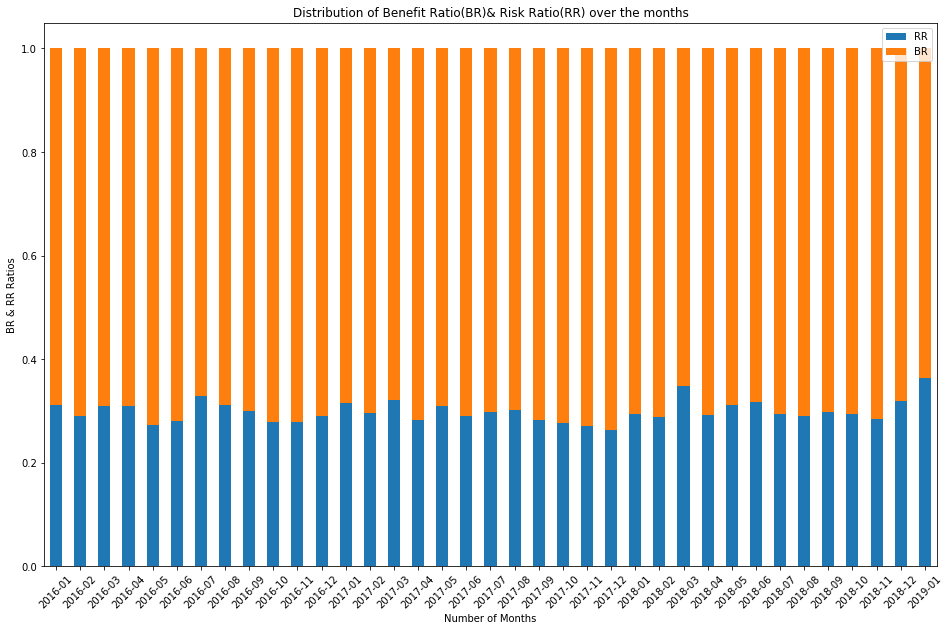

In [138]:
#Ploting stack chart

df_strackchart.plot.bar(stacked=True , rot=45 , title= "Distribution of Benefit Ratio(BR)& Risk Ratio(RR) over the months")
plt.xlabel("Number of Months")
plt.ylabel("BR & RR Ratios")
plt.show(block=True);

### 6a)- For Risk Related Sentiments

In [98]:
r=q

In [99]:
r=r[r.sentiment=='Risky']

In [100]:
r.shape

(37, 3)

In [101]:
r.head()

,month_time,sentiment,ct
2,2016-01,Risky,2280
5,2016-02,Risky,1955
8,2016-03,Risky,2408
11,2016-04,Risky,2291
14,2016-05,Risky,2021


In [102]:
r.month_time.unique()

<PeriodArray>
['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07',
 '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02',
 '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
 '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04',
 '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11',
 '2018-12', '2019-01']
Length: 37, dtype: period[M]

In [103]:
type(r)

pandas.core.frame.DataFrame

In [104]:
r.sentiment.value_counts()

Risky    37
Name: sentiment, dtype: int64

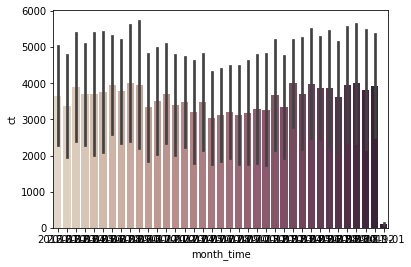

In [105]:
sns.barplot(x="month_time", y= "ct",palette="ch:.25", data=q)

### Change figure size

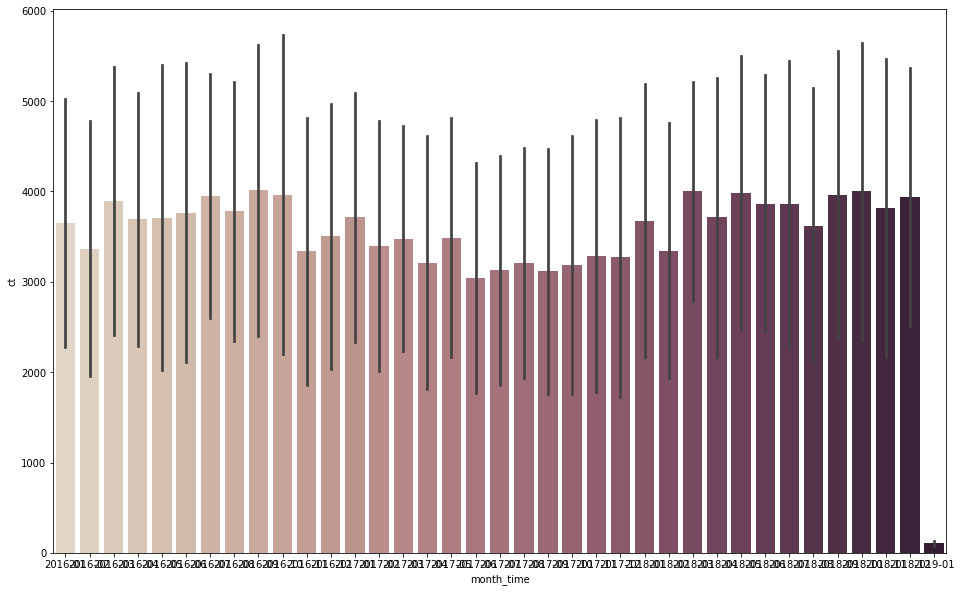

In [106]:
plt.rcParams["figure.figsize"] = (16, 10)
plt.rcParams["xtick.labelsize"] = 10
plt.figure(figsize=(16,10)) # this creates a figure 16 inch wide, 10 inch high
sns.barplot(x="month_time", y= "ct",palette="ch:.25", data=q)
plt.show()

### Rotate the ticklabels

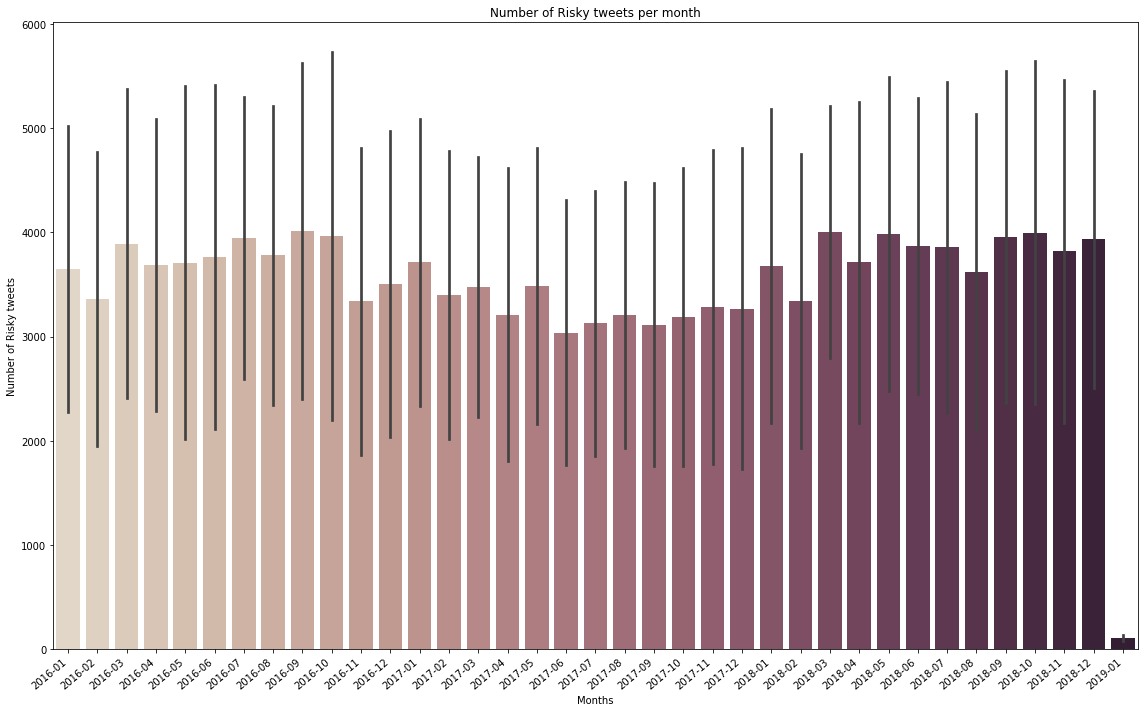

In [107]:
ax = sns.barplot(x="month_time", y= "ct",palette="ch:.25", data=q)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.xlabel("Months")
plt.ylabel("Number of Risky tweets")
plt.title("Number of Risky tweets per month")
plt.tight_layout()
plt.show()

### 6b.for beneficial sentiments

In [139]:
b=df_count

In [140]:
b=b[b.sentiment=='Benefit']

In [141]:
b.shape

(37, 3)

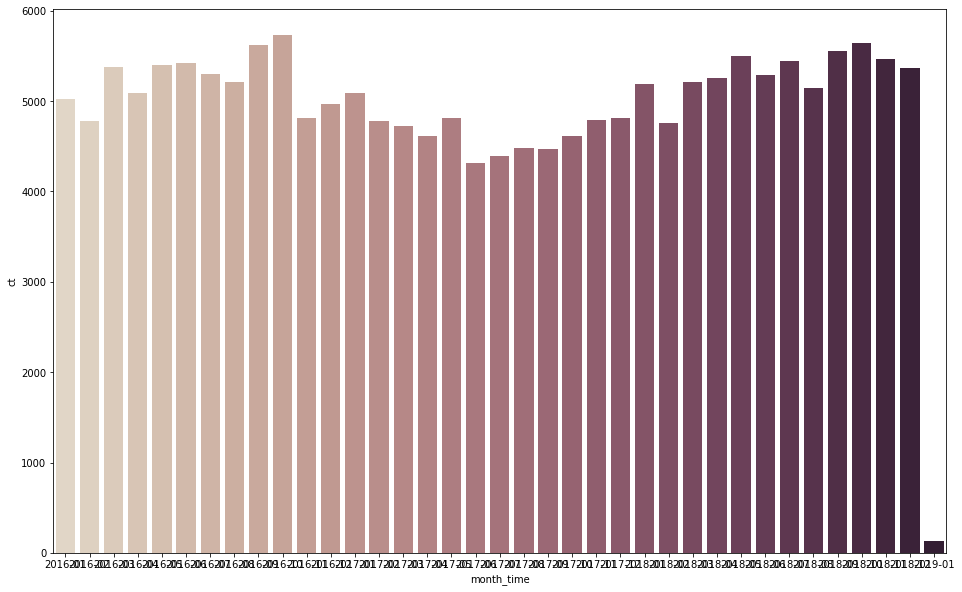

In [142]:
plt.rcParams["figure.figsize"] = (16, 10)
plt.rcParams["xtick.labelsize"] = 10
plt.figure(figsize=(16,10)) # this creates a figure 16 inch wide, 10 inch high
sns.barplot(x="month_time", y= "ct",palette="ch:.25", data=b)
plt.show()

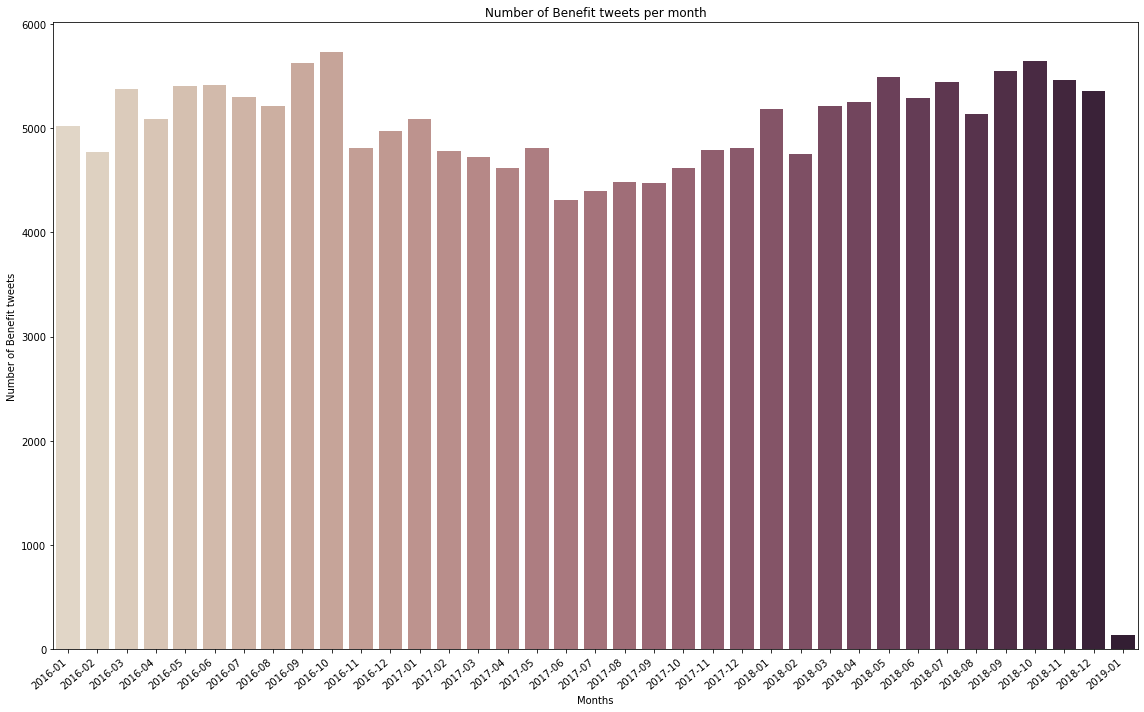

In [143]:
ax = sns.barplot(x="month_time", y= "ct",palette="ch:.25", data=b)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Months")
plt.ylabel("Number of Benefit tweets")
plt.title("Number of Benefit tweets per month")
plt.tight_layout()
plt.show()

**We shall work from here**


- Problem of sorting
- make word cloud with risk vs benefit

# 7)- Getting company names
from company_label notebook

In [147]:
df.head(2)

,TEXT,sentiment,Date
1,"Another reason I failed in love is I'm poor,I ...",Benefit,2018-07-31
2,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,Neutral,2018-07-31


In [148]:
df.shape

(455727, 3)

In [149]:
company = pd.read_pickle('company_label.pkl')

In [150]:
company.head(2)

,TEXT,UTC DATE,month,year,Google,google,tesla,gm,apple,ford,...,porsche,opel,waymo,aptiv,intel,baidu,toyota,renault,mitsubishi,nissan
1,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,2018-07-31 23:30:00,7,2018,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Happy birthday to the Audi chasing maniac, hop...",2018-07-31 22:52:45,7,2018,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
company.shape

(455726, 24)

### 7.1)- Merging dataframes



In [152]:
company=company.drop(['TEXT','UTC DATE','month','year','Google'],axis=1)

In [153]:
company.shape

(455726, 19)

In [154]:
company['sentiment']=df['sentiment']

In [155]:
company.shape

(455726, 20)

**check missing values**

In [156]:
company.isnull().sum()

google          0
tesla           0
gm              0
apple           0
ford            0
daimler-benz    0
volkswagen      0
bmw             0
audi            0
porsche         0
opel            0
waymo           0
aptiv           0
intel           0
baidu           0
toyota          0
renault         0
mitsubishi      0
nissan          0
sentiment       0
dtype: int64

### 7.2 Ploting companies vs total number of tweets

In [157]:
company.columns

Index(['google', 'tesla', 'gm', 'apple', 'ford', 'daimler-benz', 'volkswagen',
       'bmw', 'audi', 'porsche', 'opel', 'waymo', 'aptiv', 'intel', 'baidu',
       'toyota', 'renault', 'mitsubishi', 'nissan', 'sentiment'],
      dtype='object')

In [158]:
c=company

In [159]:
c.head()

,google,tesla,gm,apple,ford,daimler-benz,volkswagen,bmw,audi,porsche,opel,waymo,aptiv,intel,baidu,toyota,renault,mitsubishi,nissan,sentiment
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Benefit
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Neutral
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Benefit
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Neutral
5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Neutral


In [160]:
plot_c=c.drop('sentiment', axis=1)

In [161]:
plot_c.shape

(455726, 19)

In [162]:
# add all value

plot_var_c=plot_c.sum(axis=0)

In [163]:
plot_sort_c=plot_var_c.sort_values()
plot_sort_c

daimler-benz       51
mitsubishi        198
aptiv             250
baidu             710
renault           927
opel              940
nissan           1640
toyota           3070
intel            3442
waymo            3612
apple            4499
google           8732
volkswagen      18324
ford            18524
tesla           22601
gm              31711
audi            45766
porsche         65246
bmw             71294
dtype: int64

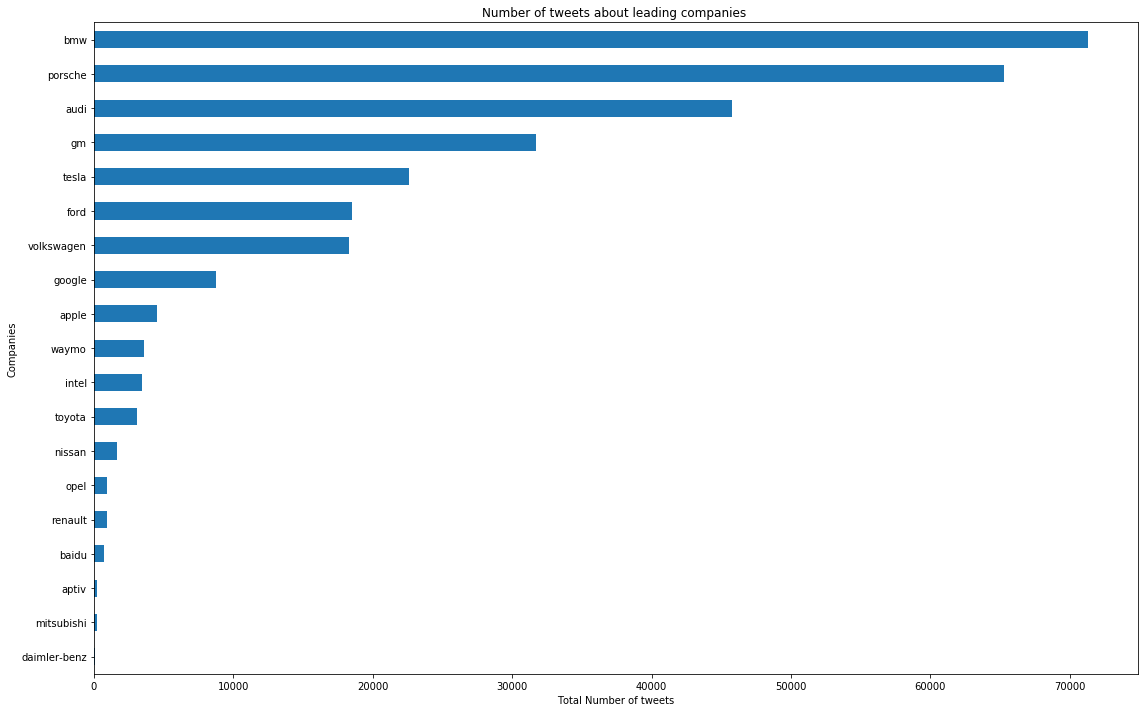

In [165]:
plot_sort_c.plot(kind='barh')
plt.xlabel("Total Number of tweets")
plt.ylabel("Companies")
plt.title("Number of tweets about leading companies ")
plt.tight_layout()
plt.show()

### 7.3)-Making two classes only

getting rid of Neutral

In [168]:
company.sentiment.value_counts()

Neutral    195718
Benefit    182533
Risky       77475
Name: sentiment, dtype: int64

In [169]:
company=company[company.sentiment!= "neutral"]

In [170]:
company.shape

(455726, 20)

In [171]:
company.columns

Index(['google', 'tesla', 'gm', 'apple', 'ford', 'daimler-benz', 'volkswagen',
       'bmw', 'audi', 'porsche', 'opel', 'waymo', 'aptiv', 'intel', 'baidu',
       'toyota', 'renault', 'mitsubishi', 'nissan', 'sentiment'],
      dtype='object')

In [172]:
company.head(3)

,google,tesla,gm,apple,ford,daimler-benz,volkswagen,bmw,audi,porsche,opel,waymo,aptiv,intel,baidu,toyota,renault,mitsubishi,nissan,sentiment
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Benefit
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Neutral
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Benefit


### 7.4)-Plot beneficial tweets vs companies

**filter only for benefit tweets**

In [173]:
b=company

In [174]:
b=b[b.sentiment=="Benefit"]

In [175]:
b.sentiment.value_counts()

Benefit    182533
Name: sentiment, dtype: int64

In [176]:
plot_b=b.drop('sentiment', axis=1)

In [177]:
plot_b.shape

(182533, 19)

In [178]:
# add all value

plot_var_b=plot_b.sum(axis=0)

In [179]:
plot_sort_b=plot_var_b.sort_values()

In [180]:
plot_sort_b

daimler-benz       29
mitsubishi         75
aptiv              95
baidu             211
opel              360
renault           410
nissan            688
toyota           1254
waymo            1301
intel            1306
apple            1577
google           2893
ford             7000
volkswagen       7616
tesla            8147
gm              12118
audi            19440
porsche         28164
bmw             30340
dtype: int64

In [182]:
len(plot_sort_b)

19

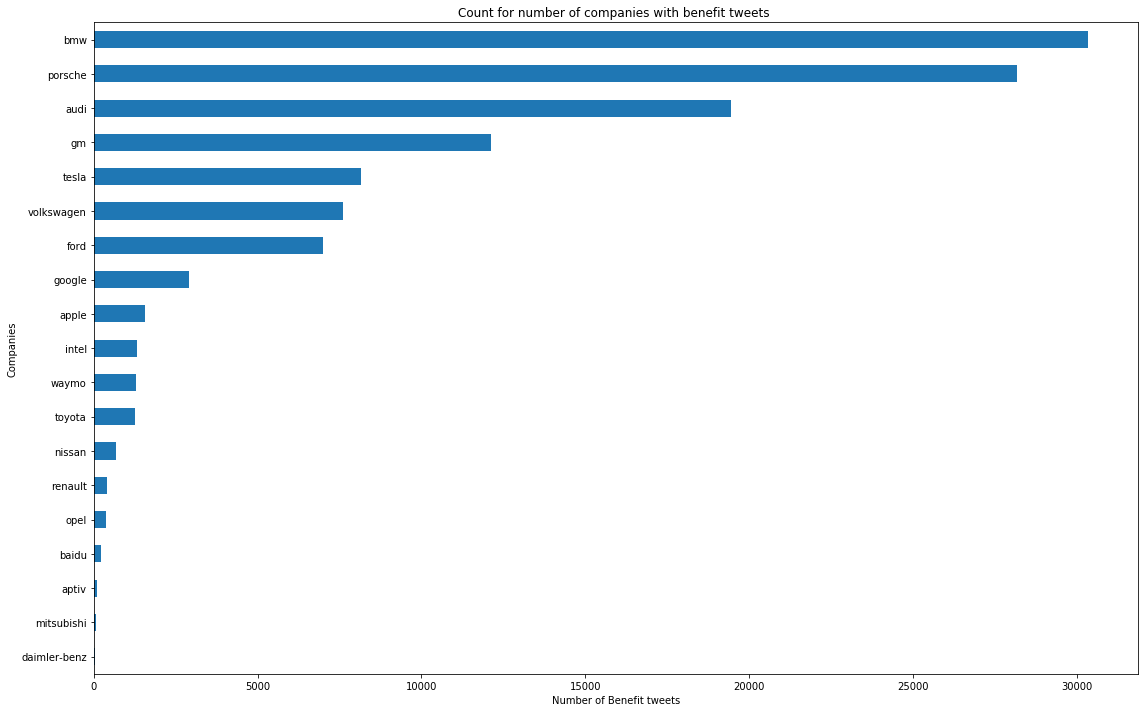

In [181]:
plot_sort_b.plot(kind='barh')
plt.xlabel("Number of Benefit tweets")
plt.ylabel("Companies")
plt.title("Count for number of companies with benefit tweets ")
plt.tight_layout()
plt.show()

### 7.5)-Plot risky tweets vs companies

In [183]:
r=company

In [184]:
r=r[r.sentiment=="Risky"]

In [185]:
r.sentiment.value_counts()

Risky    77475
Name: sentiment, dtype: int64

In [186]:
plot_r=r.drop('sentiment', axis=1)

In [187]:
plot_r.shape

(77475, 19)

In [188]:
# add all values of companies

plot_var_r=plot_r.sum(axis=0)

In [191]:
plot_sort_r=plot_var_r.sort_values()

In [192]:
plot_sort_r

daimler-benz        6
mitsubishi         35
aptiv              43
renault           153
opel              153
baidu             155
nissan            269
toyota            516
intel             633
waymo             780
apple             800
google           1705
volkswagen       2939
ford             3101
tesla            4009
gm               5724
audi             7092
porsche          9967
bmw             11095
dtype: int64

In [193]:
len(plot_sort_r)

19

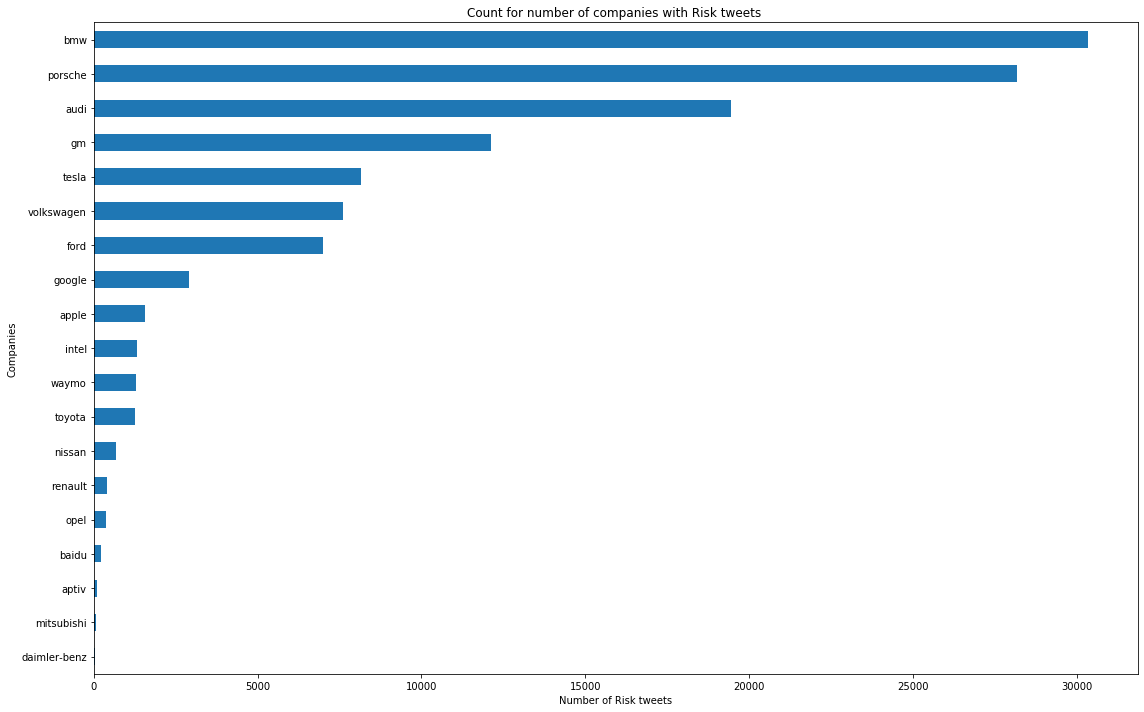

In [194]:
plot_sort_b.plot(kind='barh')
plt.xlabel("Number of Risk tweets")
plt.ylabel("Companies")
plt.title("Count for number of companies with Risk tweets ")
plt.tight_layout()
plt.show()

# 8)- Calculate RR & BR

w.r.t companies now

In [202]:
df_comp = pd.DataFrame(plot_sort_b, columns=['benefit'])
df_comp

,benefit
daimler-benz,29
mitsubishi,75
aptiv,95
baidu,211
opel,360
renault,410
nissan,688
toyota,1254
waymo,1301
intel,1306


In [203]:
df_comp2 = pd.DataFrame(plot_sort_r, columns=['risk'])
df_comp2

,risk
daimler-benz,6
mitsubishi,35
aptiv,43
renault,153
opel,153
baidu,155
nissan,269
toyota,516
intel,633
waymo,780


In [204]:
df_comp['risk']= df_comp2['risk']

In [205]:
df_comp

,benefit,risk
daimler-benz,29,6
mitsubishi,75,35
aptiv,95,43
baidu,211,155
opel,360,153
renault,410,153
nissan,688,269
toyota,1254,516
waymo,1301,780
intel,1306,633


In [207]:
# using formula to create new variables
df_comp['RR']=(df_comp['risk'])/(df_comp['risk']+df_comp['benefit'])
df_comp['BR']=(df_comp['benefit'])/(df_comp['risk']+df_comp['benefit'])

In [208]:
df_comp

,benefit,risk,RR,BR
daimler-benz,29,6,0.171429,0.828571
mitsubishi,75,35,0.318182,0.681818
aptiv,95,43,0.311594,0.688406
baidu,211,155,0.423497,0.576503
opel,360,153,0.298246,0.701754
renault,410,153,0.271758,0.728242
nissan,688,269,0.281087,0.718913
toyota,1254,516,0.291525,0.708475
waymo,1301,780,0.374820,0.625180
intel,1306,633,0.326457,0.673543


### 8.a.ploting RR

In [210]:
plot_RR=df_comp.RR.sort_values()

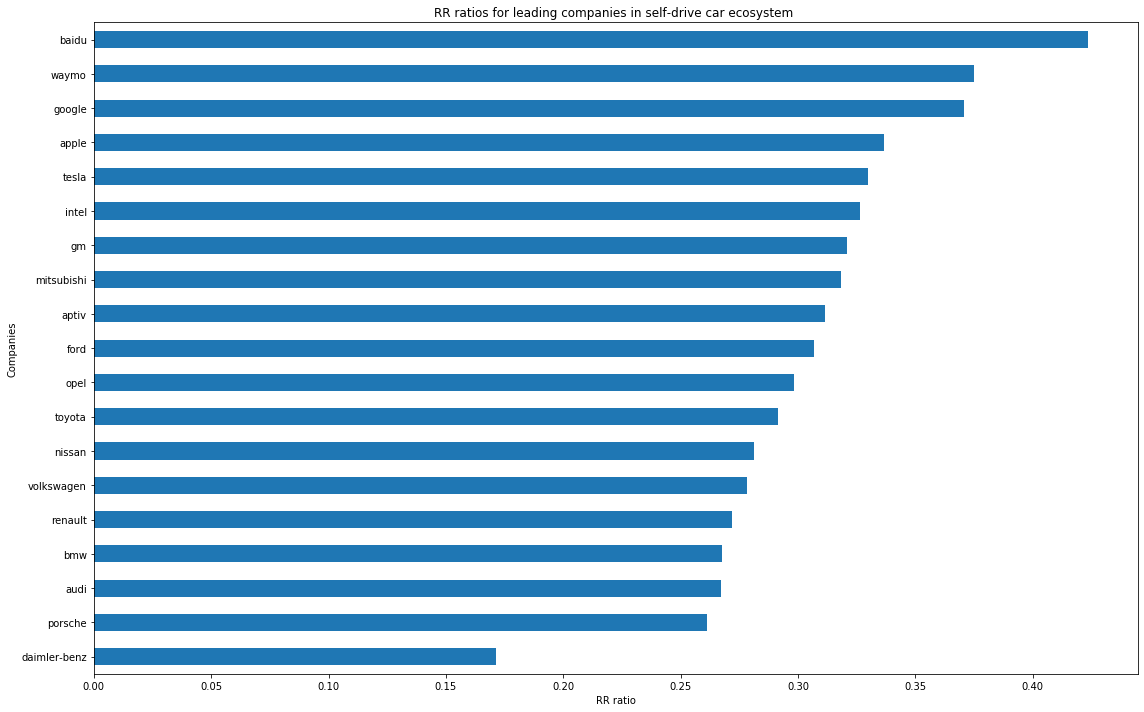

In [211]:
plot_RR.plot(kind='barh')
plt.xlabel("RR ratio")
plt.ylabel("Companies")
plt.title("RR ratios for leading companies in self-drive car ecosystem ")
plt.tight_layout()
plt.show()

### 8.b. plotting BR

In [212]:
plot_BR=df_comp.BR.sort_values()

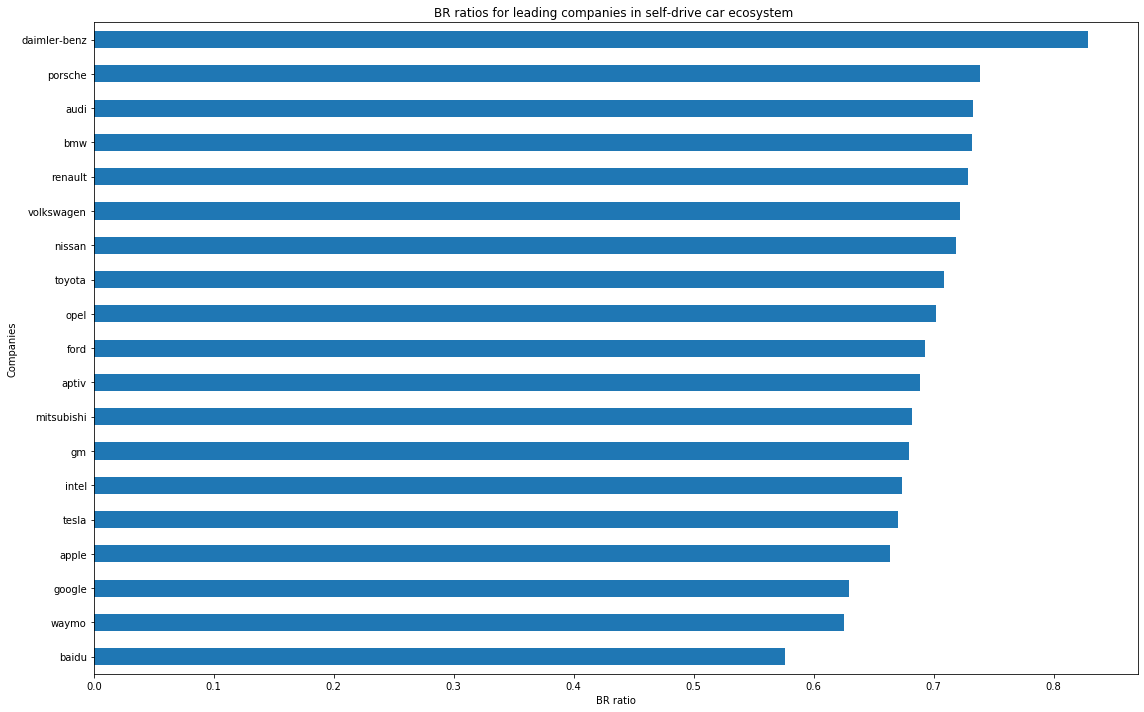

In [213]:
plot_BR.plot(kind='barh')
plt.xlabel("BR ratio")
plt.ylabel("Companies")
plt.title("BR ratios for leading companies in self-drive car ecosystem ")
plt.tight_layout()
plt.show()

# 9)-Submit work

We have three main dataset for which we have processed data, cleaned, implemented model and finally did descriptive analysis.

### 1st dataset

In [ ]:
company = pd.read_pickle('company_label.pkl')

In [ ]:
company.shape

In [ ]:
company.columns

In [ ]:
company=company.drop(['month','year','Google'],axis=1)

In [ ]:
df_submit=company

### 2nd dataset

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df_submit['sentiment']= df['sentiment']

In [ ]:
df_submit.columns

In [ ]:
df_submit.shape

In [ ]:
filename='tweets.csv'
df_org = pd.read_csv(filename, delimiter='\t', header=None,names=['TWEET ID','TIMESTAMP','UTC DATE','USER ID','SCREEN NAME','NAME','Q','TEXT'])

In [ ]:
df_org.shape

In [ ]:
df_org.columns

In [ ]:
df_submit[['TWEET ID','TIMESTAMP','USER ID','SCREEN NAME']]=df_org[['TWEET ID','TIMESTAMP','USER ID','SCREEN NAME']]

In [ ]:
df_submit.shape

In [ ]:
df_submit.columns

In [ ]:
df_submit.head()

In [ ]:
df_submit.isnull().sum()

In [ ]:
df_submit.to_csv('submit.csv',index=False)
#df_submit.to_excel('submit.xlsx',index=False)

# END of Notebook